In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib import patches
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image as img
from skimage import data, color, io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray

sys.path.append("../")
from models.expression_recognition.architecture.build import facial_recognition_model
from models.expression_recognition.architecture.utils import get_expression_label
from models.yolo_face_detector import YoloFaceDetector

In [2]:

#load face detection model
face_detector = YoloFaceDetector(model_path="../model_config/weights/wider_face_yolo.h5",
                                 anchors_path="../model_config/wider_anchors.txt",
                                 classes_path="../model_config/wider_classes.txt")

Model loaded with weights from ../model_config/weights/wider_face_yolo.h5.


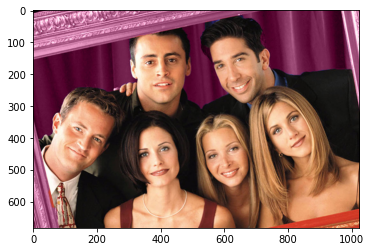

In [3]:
image = image.imread('../model_config/test_images/friends.jpg')
plt.imshow(image)
plt.show()

In [4]:
faces = face_detector.detect(image)

Face:  (x: 285, y: 80, width: 170, height: 198, score: 0.9114540815353394)
Face:  (x: 56, y: 300, width: 162, height: 190, score: 0.8855919241905212)
Face:  (x: 525, y: 82, width: 155, height: 195, score: 0.7970519661903381)
Face:  (x: 494, y: 372, width: 154, height: 172, score: 0.7497848272323608)
Face:  (x: 280, y: 376, width: 153, height: 167, score: 0.7322945594787598)
Face:  (x: 689, y: 297, width: 159, height: 158, score: 0.5718054175376892)


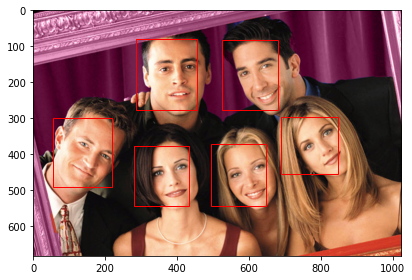

In [5]:
fig, ax = plt.subplots(1)

ax.imshow(image)

for face in faces:
  print('Face: ', face)
  rect = patches.Rectangle((face.x, face.y), face.width, face.height, edgecolor='r', facecolor='None')
  ax.add_patch(rect)

plt.tight_layout()
plt.draw()
plt.show()

In [6]:
expression_predictor = facial_recognition_model()

In [7]:
expression_predictor.load_weights('../models/expression_recognition/weights/weights.h5')

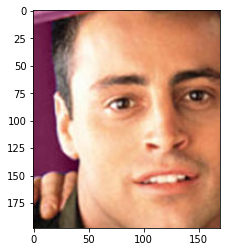

Expression Prediction: neutral


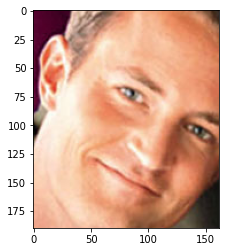

Expression Prediction: neutral


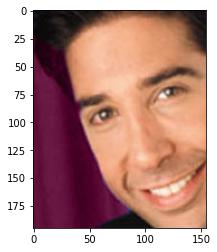

Expression Prediction: angry


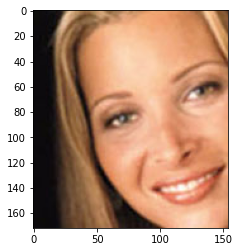

Expression Prediction: neutral


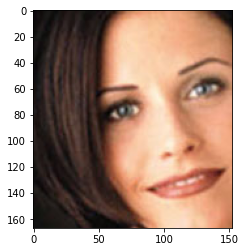

Expression Prediction: happy


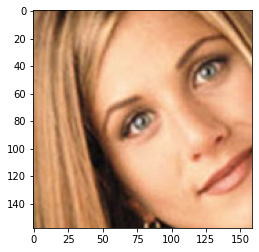

Expression Prediction: neutral


In [8]:
for face in faces:
  cropped_face = image[face.y:(face.y + face.height), face.x:(face.x + face.width), :]
  plt.imshow(cropped_face)
  plt.show()

  image_resized = resize(cropped_face, (48, 48, 1),anti_aliasing=True)
  image_resized = img.img_to_array(image_resized)
  image_resized = np.expand_dims(image_resized, axis = 0)

  result = expression_predictor.predict(image_resized)

  
        
  print('Expression Prediction:', get_expression_label(result))
  
